In [2]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt

In [32]:

data_list = ["banknote", "yeast", "climate_model_crashes"]
#data_list = ['wine_quality_white','yacht_hydrodynamics','concrete_compression']
type_list = ["mnar", "mar", "mcar"]
para_list = [0.05,0.1,0.3,0.5]

models = ["baseline","KPCA_RBF","PPCA","IK"]

In [6]:
para_list = [0.05]

In [33]:
for data in data_list:
    for type in type_list:
        for para in para_list:
            df = pd.DataFrame()
            for model in models:
                file_path = "results/{}/{}/{}/{}.csv".format(model, data, type, para)
                if os.path.exists(file_path):
                    try:
                        sub_df = pd.read_csv(file_path)
                        # Add a new column named "model" filled with the model name
                        sub_df.insert(0, 'model', model)
                        # Concatenate sub_df to df
                        df = pd.concat([df, sub_df], ignore_index=True)
                    except pd.errors.EmptyDataError:
                        print(f"Empty data in {file_path}, skipping this file.")
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                else:
                    print(f"File {file_path} does not exist, skipping.")
            
            output_path = "results/{}_{}_{}.csv".format(data, type, para)
            df.to_csv(output_path, index=False)
            print(f"Saved combined results to {output_path}")


Saved combined results to results/banknote_mnar_0.05.csv
Saved combined results to results/banknote_mnar_0.1.csv
Saved combined results to results/banknote_mnar_0.3.csv
Saved combined results to results/banknote_mnar_0.5.csv
Saved combined results to results/banknote_mar_0.05.csv
Saved combined results to results/banknote_mar_0.1.csv
Saved combined results to results/banknote_mar_0.3.csv
Saved combined results to results/banknote_mar_0.5.csv
Saved combined results to results/banknote_mcar_0.05.csv
Saved combined results to results/banknote_mcar_0.1.csv
Saved combined results to results/banknote_mcar_0.3.csv
Saved combined results to results/banknote_mcar_0.5.csv
Saved combined results to results/yeast_mnar_0.05.csv
Saved combined results to results/yeast_mnar_0.1.csv
Saved combined results to results/yeast_mnar_0.3.csv
Saved combined results to results/yeast_mnar_0.5.csv
Saved combined results to results/yeast_mar_0.05.csv
Saved combined results to results/yeast_mar_0.1.csv
Saved combi

In [46]:
index = df["model"]+"_"+df["Imputer"]

In [35]:
index


0     baseline_mean Imputer
1     baseline_mice Imputer
2             KPCA_RBF_zero
3             KPCA_RBF_mean
4             KPCA_RBF_mice
5                 PPCA_zero
6                 PPCA_mean
7                 PPCA_mice
8                   IK_zero
9                   IK_mean
10                  IK_mice
dtype: object

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


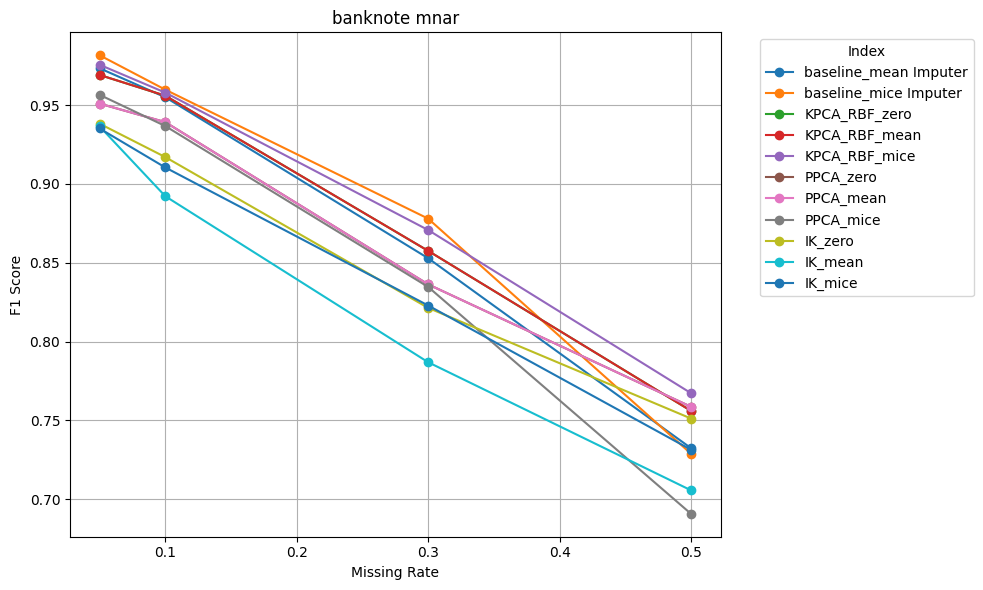

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


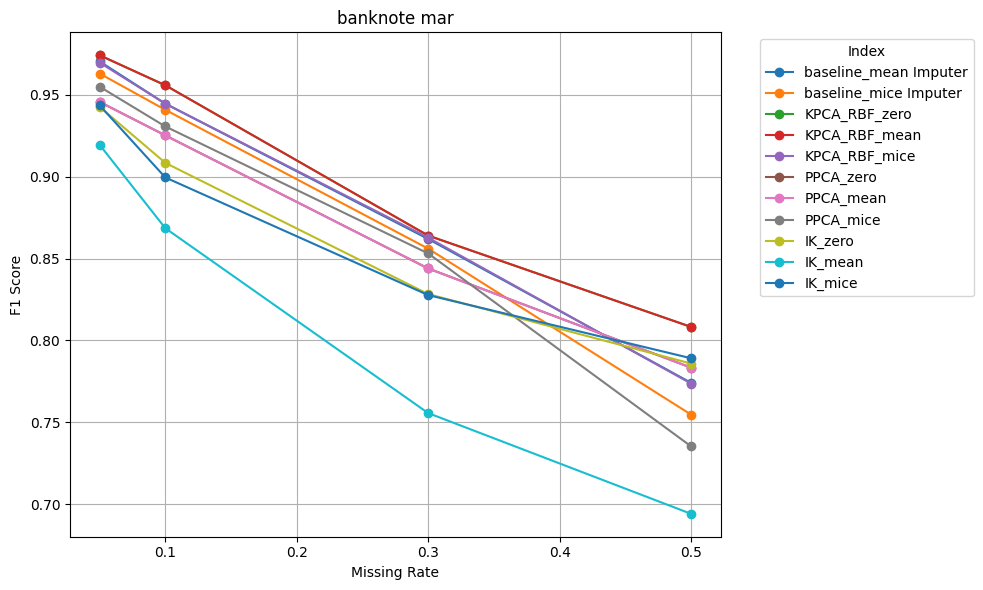

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


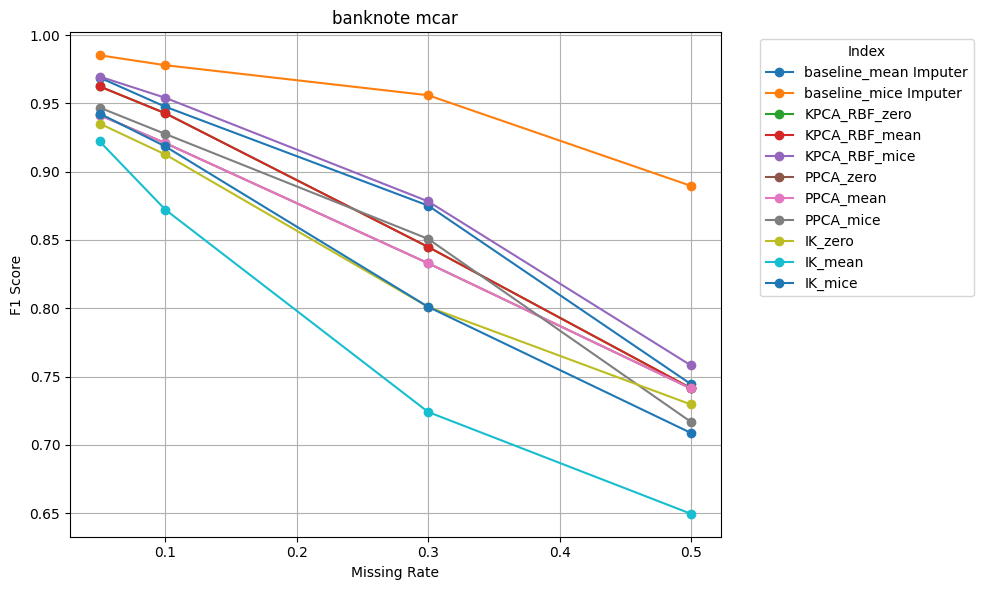

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


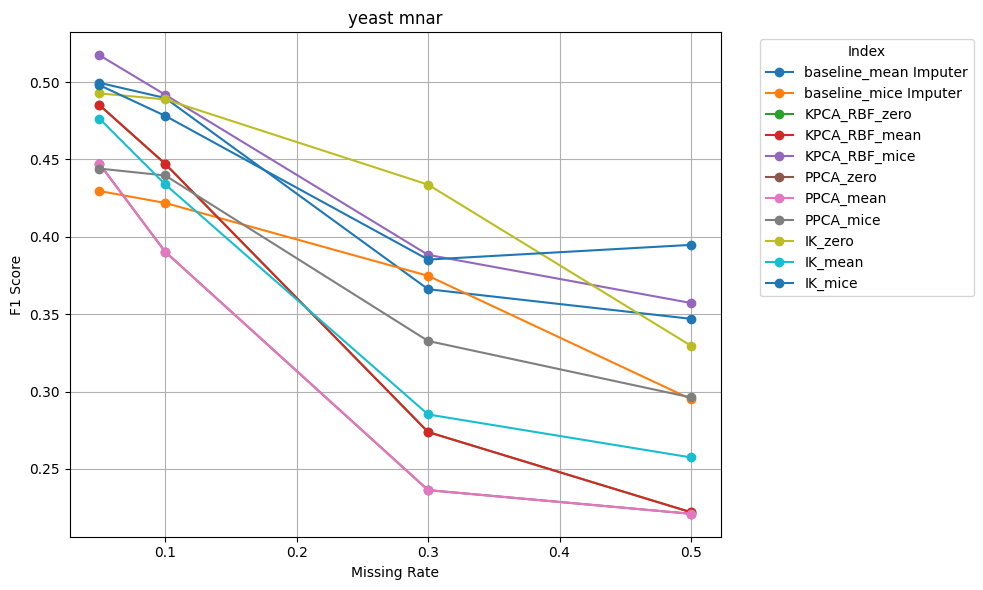

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


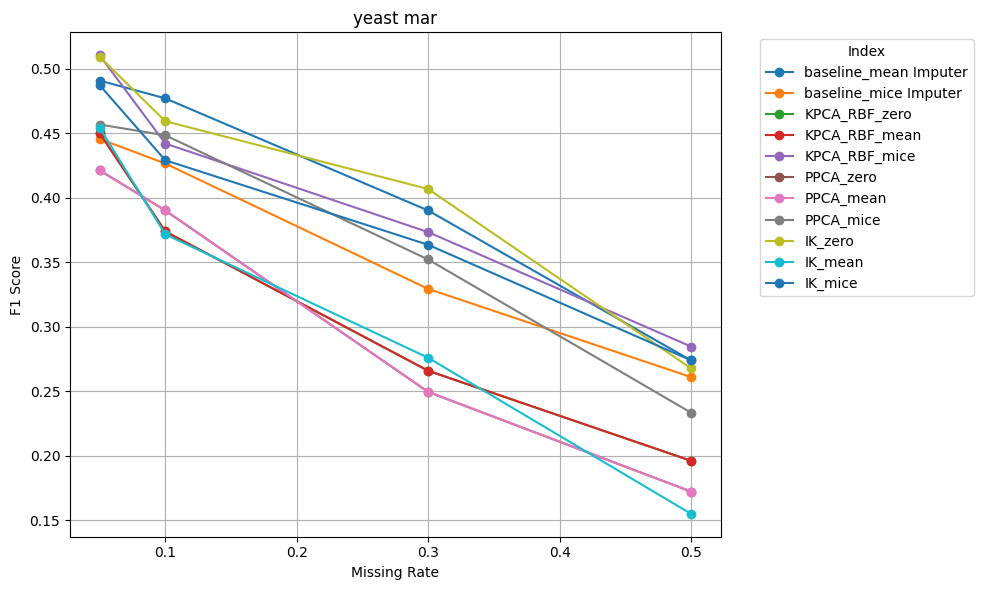

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


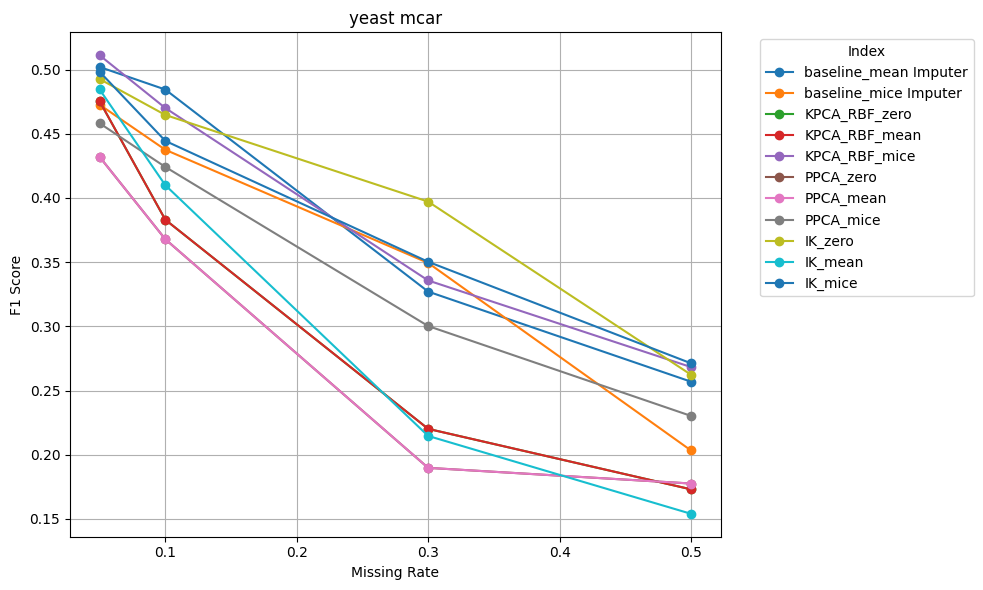

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


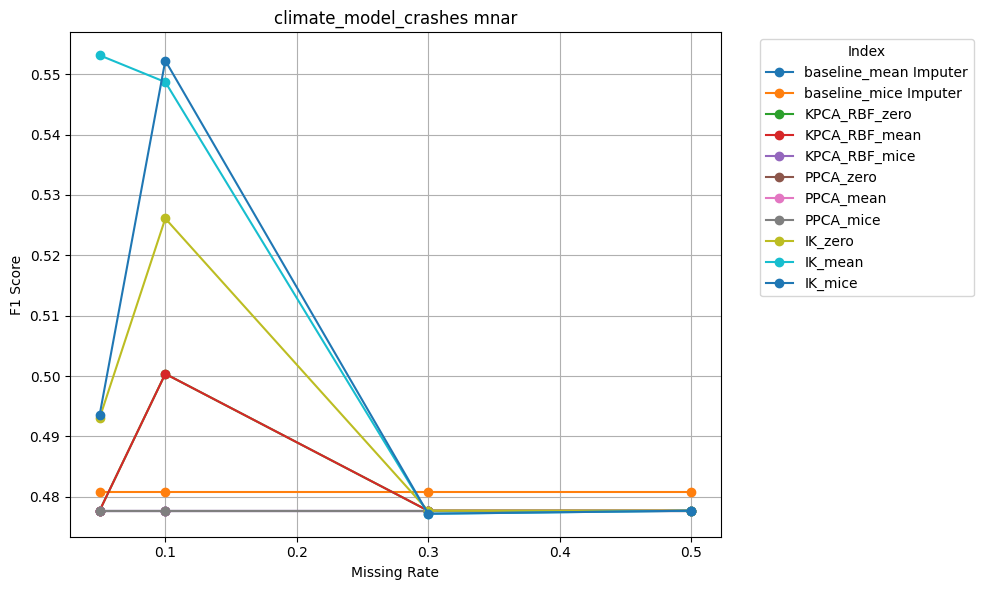

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


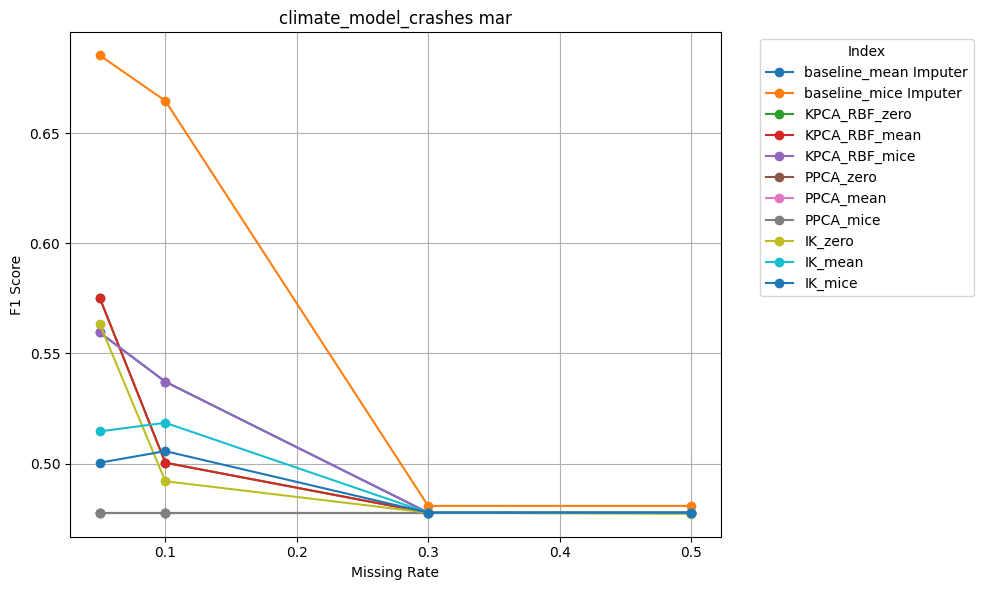

Saved F1 scores to save/climate_model_crashes_mcar_f1_scores.csv


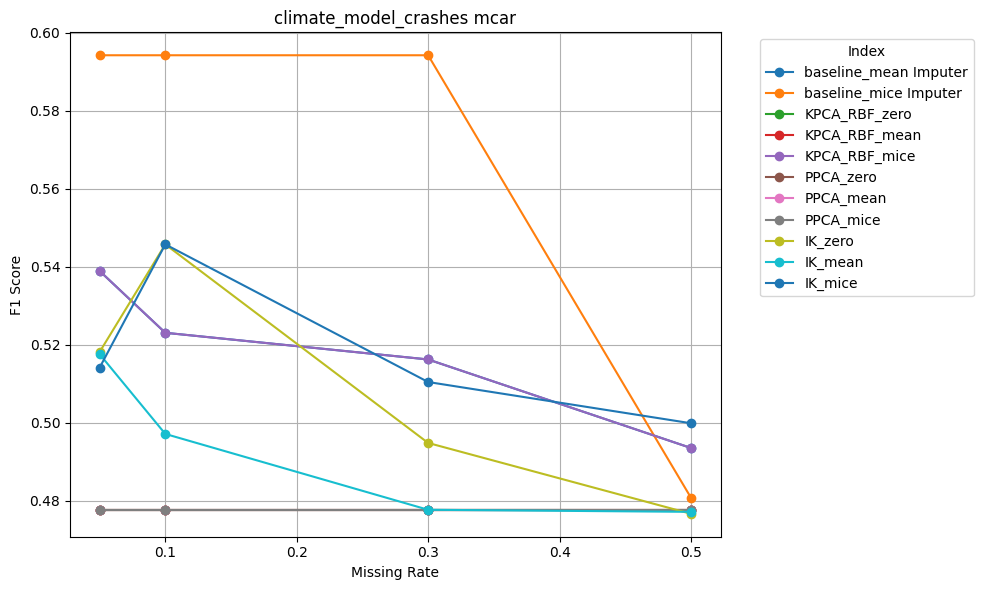

In [50]:
for data in data_list:
    for mech in type_list:
        # Initialize df_all with columns named after para_list
        df_all = pd.DataFrame(columns=para_list)
        for para in para_list:
            file_path = "results/{}_{}_{}.csv".format(data, mech, para)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                # Assuming 'F1 Score' is a column in df
                f1_score = df["F1 Score"]  # Get the F1 Score value
                df_all[para] = f1_score
            else:
                print(f"File {file_path} does not exist, skipping.")

        df_all.index = index
        # Save df_all to a new CSV file
        #output_path = "save/{}_{}_f1_scores.csv".format(data, type)
        df_all.to_csv(output_path, index=False)
        print(f"Saved F1 scores to {output_path}")

        
        columns = df_all.columns
        plt.figure(figsize=(10, 6))
        for type, row in df_all.iterrows():
            plt.plot(columns, row, "-o",label=f'{type}')

        plt.xlabel('Missing Rate')
        plt.ylabel('F1 Score')
        plt.title(f'{data} {mech}')
        plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()